Overview
The so-called paradoxes of an author, to which a reader takes exception, often exist not in the author's book at all, but rather in the reader's head. - Friedrich Nietzsche Books are open doors to the unimagined worlds which is unique to every person. It is more than just a hobby for many. There are many among us who prefer to spend more time with books than anything else. Here we explore a big database of books. Books of different genres, from thousands of authors. In this challenge, participants are required to use the dataset to build a Machine Learning model to predict the price of books based on a given set of features. Size of training set: 6237 records Size of test set: 1560 records FEATURES: Title: The title of the book Author: The author(s) of the book. Edition: The edition of the book eg (Paperback,– Import, 26 Apr 2018) Reviews: The customer reviews about the book Ratings: The customer ratings of the book Synopsis: The synopsis of the book Genre: The genre the book belongs to BookCategory: The department the book is usually available at. Price: The price of the book (Target variable)

                                                
Evaluation:
1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean())



In [13]:
def performance(): 
    pred1 = model.predict(x_train)
    pred = model.predict(x_test)
    real = [y_train, y_test] 
    est = [pred1, pred]
    nam=["Model performance in Train Data","Model performance in Test Data"] 
    for (a, b,c) in zip(real, est,nam):
        print(c)
        # Measure MSE error. 
        score = metrics.mean_squared_error(a,b)
        print("Final score (MSE): {}".format(score))
        # Measure RMSE error.  RMSE is common for regression.
        score = np.sqrt(metrics.mean_squared_error(a,b))
        print("Final score (RMSE): {}".format(score))
        print("Final score (R^2):",metrics.r2_score(a,b))
        errors = abs(b - a)
        mape = 100 * np.mean(errors / a)
        accuracy = 100 - mape
        print('Average Error: {:0.4f}'.format(np.mean(errors)))
        print('Accuracy = {:0.2f}%'.format(accuracy))
        print('evaulation',1 - np.sqrt(np.square(np.log10(b +1) - np.log10(a +1)).mean()))

    plt.rcParams['agg.path.chunksize'] = 10000
    style.use('ggplot')
  

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(y_train,pred1, s=10, c='b',marker='s', label='Train Data')
    ax1.scatter(y_test,pred, s=10, c='r',marker='+' , label='Test Data')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.legend(loc='upper left');
    plt.show()

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
train_real1=pd.read_excel("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Data_Train.xlsx")
train_real2=train_real1.drop(['Price'],axis=1)
test=pd.read_excel("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Data_Test.xlsx")
sample_submission=pd.read_excel("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Sample_Submission.xlsx")

In [184]:
train_real1.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price'],
      dtype='object')

In [185]:
train_real1.shape, test.shape   

((6237, 9), (1560, 8))

In [186]:
train=pd.concat([train_real1,test],axis=0,ignore_index=True)

In [187]:
def findint(new_string):
    emp_str = ""
    for m in new_string:
        if m.isdigit():
            emp_str = emp_str + m
    return emp_str

In [188]:
for i in range(len(train)):
    train['Edition'][i] = findint(train["Edition"][i])[-4:]
    train["Reviews"][i] = float(findint(train["Reviews"][i][:3]))
    train["Ratings"][i] = float(findint(train["Ratings"][i][:1]))
    
# train["Reviews"] = train["Reviews"].apply(lambda x: int(x[0][:3]))
# train["Ratings"] = train["Ratings"].apply(lambda x: int(x[0][:1]))


C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd

In [189]:
import textblob            #to import
from textblob import TextBlob
train[['polarity', 'subjectivity']] = train['Synopsis'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [190]:
encoding_Genre = pd.get_dummies(train.Genre, prefix='Genre')
# encoding_Bookcat = pd.get_dummies(train.BookCategory, prefix='BookCategory')
encoding_Author = pd.get_dummies(train.Author, prefix='Author')
# train1=pd.concat([train,encoding_Bookcat,encoding_Genre],axis=1)
encoding_Genre

,Genre_API & Operating Environments,Genre_Action & Adventure (Books),Genre_Active Outdoor Pursuits (Books),Genre_Aeronautical Engineering,Genre_Aesthetics,Genre_Agriculture & Farming (Books),Genre_Air Sports (Books),Genre_Algebra & Trigonometry,Genre_Algorithms,Genre_Alphabet Reference,...,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
train1=pd.concat([train,encoding_Genre,encoding_Author],axis=1)
data = train1.drop(["Title","Ratings","Edition","Genre_API & Operating Environments","BookCategory","Genre","Author","Author_Ziauddin Sardar","Synopsis"], axis=1)

In [192]:
target=train_real1['Price'][0:6237]

In [28]:
# data=data[["Price","Ratings","polarity"]]


In [29]:
# correlation=data.corr()
# corr1=correlation['Price'].sort_values(ascending=False)
# corr2= corr1[abs(corr1)>.00]

# list1=list(corr2.index)[1:]
# data=data[list1]

In [30]:
# data

In [193]:
# correlation=data.corr()
# corr1=correlation['Price'].sort_values(ascending=False)
# corr1[abs(corr1)>.1]
data_train=data[0:6237]
data_train=data_train.drop(['Price'],axis=1)
data_test=data[6237:]
data_test=data_test.drop(['Price'],axis=1)
# data=data[["BookCategory_Computing, Internet & Digital Media","Genre_Comics","BookCategory_Arts, Film & Photography","Genre_Labor & Industrial Relations","Genre_Photography Textbooks","Genre_Design","Genre_Software & Business Applications (Books)","BookCategory_Biographies, Diaries & True Accounts","BookCategory_Crime, Thriller & Mystery"]][0:6237]
# corr1

In [194]:
data_train.shape

(6237, 4736)

In [195]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import StratifiedKFold  #for classifier
from sklearn.model_selection import KFold #for regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import time
# Create train/test
x_train, x_test, y_train, y_test = train_test_split(data_train,target, test_size=0.3,random_state=42)

In [35]:
# # !pip install lightgbm
# import lightgbm as lgb
 
# # Similarly LGBMRegressor can also be imported for a regression model.
# from lightgbm import LGBMClassifier
# # lg = LGBMClassifier()
# lg = lgb.LGBMRegressor()
# model=lg.fit(x_train, y_train)
# performance()

In [196]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Columns: 4736 entries, Reviews to Author_sister Jesme
dtypes: float64(2), object(1), uint8(4733)
memory usage: 28.3+ MB


In [197]:
import xgboost
plt.style.use('ggplot')
import sklearn.metrics as metrics
from matplotlib import style
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# xg=xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.4, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 200)      
# model=xg.fit(x_train,y_train)
# performance()
# # print("------------------------------------------------------")
# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, data, target, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force scores to be positive
# scores = abs(scores)
# print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Model performance in Train Data
Final score (MSE): 368406.4764595815
Final score (RMSE): 606.9649713612653
Final score (R^2): 0.25592127818594557
Average Error: 347.2468
Accuracy = -1.89%
evaulation 0.6511306823870819
Model performance in Test Data
Final score (MSE): 421535.8294354646
Final score (RMSE): 649.2579067177115
Final score (R^2): 0.024245867264327647
Average Error: 354.3116
Accuracy = 0.48%
evaulation 0.6496835054025913


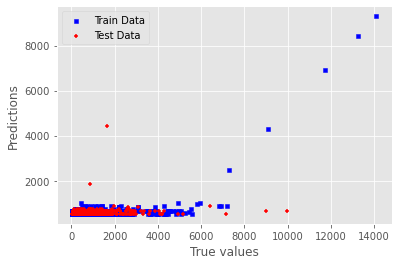

In [198]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=1,n_estimators=500,learning_rate=0.01)
model.fit(x_train,y_train)
performance()

In [587]:
# data_test=data_test.drop(['Price'],axis=1)

In [606]:
y_pred=model.predict(data_test)

In [607]:
y_pred

array([519.90584565, 652.94341296, 652.94341296, ..., 519.90584565,
       519.90584565, 519.90584565])

C:\anaconda\envs\tenso\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model performance in Train Data
Final score (MSE): 64687.801222989925
Final score (RMSE): 254.33796653859983
Final score (R^2): 0.869348614841073
Average Error: 102.2385
Accuracy = 79.79%
evaulation 0.8838200762467173
Model performance in Test Data
Final score (MSE): 394828.83216834924
Final score (RMSE): 628.3540659280794
Final score (R^2): 0.08606614714717387
Average Error: 274.0510
Accuracy = 49.51%
evaulation 0.7179475566299606


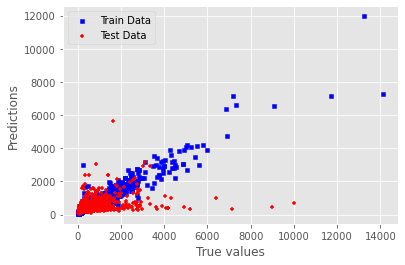

In [199]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 4.308201282704583e+16
Final score (RMSE): 207562069.8177917
Final score (R^2): -90924907951.86952
Average Error: 35390339.8252
Accuracy = -7947852.35%
evaulation -3.176613804354667
Model performance in Test Data
Final score (MSE): 9906629325833776.0
Final score (RMSE): 99532051.75135182
Final score (R^2): -20585551344.043415
Average Error: 22260891.9722
Accuracy = -5944343.98%
evaulation -3.1599669980154816


C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


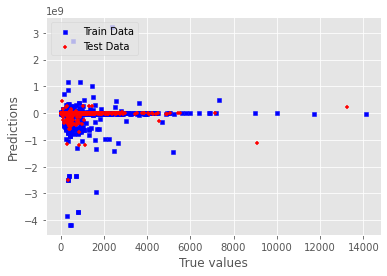

In [85]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
model.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 454.06700407025585
Final score (RMSE): 21.3088480230691
Final score (R^2): 0.9990416882164892
Average Error: 2.5686
Accuracy = 99.55%
evaulation 0.9895881717994064
Model performance in Test Data
Final score (MSE): 505717.8921527199
Final score (RMSE): 711.1384479499894
Final score (R^2): -0.050860115243159365
Average Error: 306.1784
Accuracy = 42.90%
evaulation 0.6662331448680747


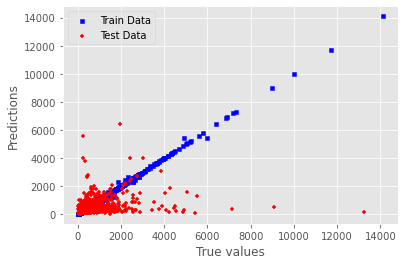

In [86]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model.fit(x_train,y_train)
performance()

C:\anaconda\envs\tenso\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model performance in Train Data
Final score (MSE): 207454.77587726884
Final score (RMSE): 455.4720363285422
Final score (R^2): 0.562165155171621
Average Error: 147.1685
Accuracy = 68.64%
evaulation 0.8238792126491855
Model performance in Test Data
Final score (MSE): 423454.85009364155
Final score (RMSE): 650.7340855477308
Final score (R^2): 0.12007896205638413
Average Error: 346.0326
Accuracy = 11.83%
evaulation 0.6726009734541116


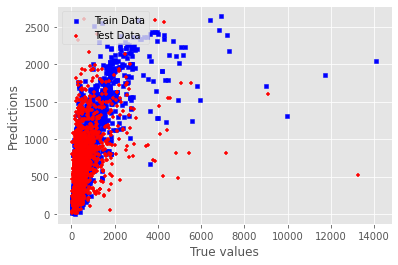

In [87]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
model = MLPRegressor(random_state=1, max_iter=500, verbose=True)
model.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 115856.3860093692
Final score (RMSE): 340.37682942493194
Final score (R^2): 0.7570737006457748
Average Error: 156.2873
Accuracy = 61.69%
evaulation nan
Model performance in Test Data
Final score (MSE): 340083.53414522094
Final score (RMSE): 583.1668150239869
Final score (R^2): 0.269472668932509
Average Error: 269.1850
Accuracy = 29.65%
evaulation 0.7139605797333279


C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


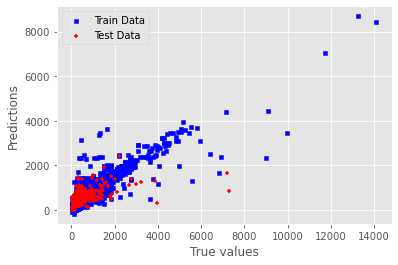

In [206]:
from sklearn import linear_model
model = linear_model.BayesianRidge()
model.fit(x_train,y_train)
performance()

C:\anaconda\envs\tenso\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Model performance in Train Data
Final score (MSE): 527367.4230100451
Final score (RMSE): 726.2006768173967
Final score (R^2): -0.06930265981584305
Average Error: 316.9914
Accuracy = 36.65%
evaulation 0.6671480510604321
Model performance in Test Data
Final score (MSE): 450354.3842226027
Final score (RMSE): 671.0844836699792
Final score (R^2): -0.08281919781597402
Average Error: 313.6824
Accuracy = 41.10%
evaulation 0.6739217869548784


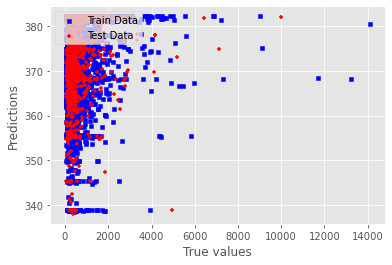

In [60]:
from sklearn import svm
model = svm.SVR()
model.fit(x_train,y_train)
performance()

In [64]:
# from sklearn.neighbors import KNeighborsTransformer
# from sklearn.datasets import make_regression
# model = make_pipeline(KNeighborsTransformer(mode='distance'),Isomap(n_components=3, metric='precomputed'),memory=cache_path)
# model.fit(x_train,y_train)
# performance()

Model performance in Train Data
Final score (MSE): 468246.8856931718
Final score (RMSE): 684.2856754990358
Final score (R^2): 0.011761471039214544
Average Error: 360.4492
Accuracy = -4.85%
evaulation 0.640277409360992
Model performance in Test Data
Final score (MSE): 476036.0003246595
Final score (RMSE): 689.9536218650204
Final score (R^2): 0.010817584421164872
Average Error: 359.3734
Accuracy = 3.16%
evaulation 0.6532050900740314


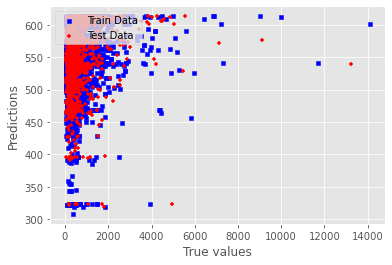

In [89]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel,random_state=0)
model.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 52929.93967033759
Final score (RMSE): 230.06507703329854
Final score (R^2): 0.8926780024629887
Average Error: 61.8438
Accuracy = 84.32%
evaulation 0.8742234245451767
Model performance in Test Data
Final score (MSE): 4.347236738601453e+24
Final score (RMSE): 2085002815010.4385
Final score (R^2): -1.0452371649793532e+19
Average Error: 948868499341.5632
Accuracy = -236591761015.10%
evaulation -1.2988310427711411


C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


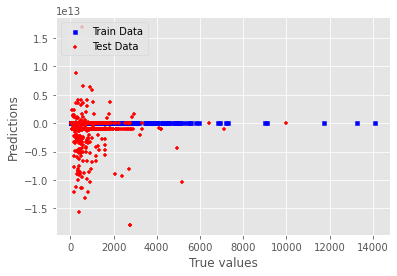

In [70]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 95042.72651359341
Final score (RMSE): 308.2900039144854
Final score (R^2): 0.8007155356061615
Average Error: 135.9920
Accuracy = 66.74%
evaulation nan
Model performance in Test Data
Final score (MSE): 336914.8869885963
Final score (RMSE): 580.4436983796071
Final score (R^2): 0.2762791829739537
Average Error: 267.6074
Accuracy = 30.43%
evaulation nan


C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


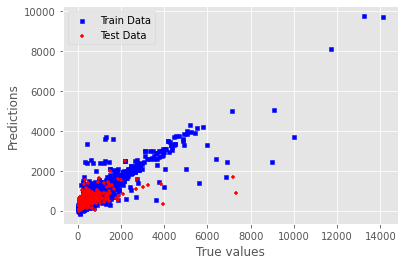

In [205]:
model = linear_model.Ridge(alpha=.5)
model.fit(x_train,y_train)
performance()

In [75]:
# from sklearn.cross_decomposition import PLSRegression
# model = PLSRegression(n_components=2)
# model.fit(x_train,y_train)
# performance()

Model performance in Train Data
Final score (MSE): 1298355.7158494175
Final score (RMSE): 1139.454130647398
Final score (R^2): -1.7401893785143576
Average Error: 1075.7682
Accuracy = -307.78%
evaulation 0.33005226451960035
Model performance in Test Data
Final score (MSE): 1361275.0142391063
Final score (RMSE): 1166.736908749829
Final score (R^2): -1.8286711633863773
Average Error: 1065.0954
Accuracy = -282.06%
evaulation 0.3515292306833414


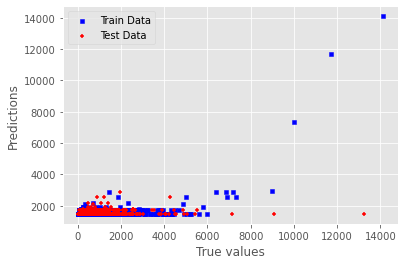

In [106]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state=20, n_estimators=50)
model.fit(x_train,y_train)
performance()

In [69]:
# from sklearn.datasets import load_diabetes
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import VotingRegressor

#  # Training classifiers
# reg1 = GradientBoostingRegressor(random_state=1)
# reg2 = RandomForestRegressor(random_state=1)
# reg3 = LinearRegression()
# model = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
# model.fit(x_train,y_train)
# performance()

In [44]:
y_pred=model.predict(data_test)
y_pred= pd.DataFrame(y_pred, columns=['Price'])
y_pred.to_csv("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Submission.csv", index=False)

In [41]:
sample_submission.head()

,Price
0,119
1,123
2,108
3,118
4,132


In [108]:
# from sklearn.model_selection import KFold

# X = np. array(data_train)
# y = np.array(data_test)
# kf = KFold(n_splits=2)

# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

In [200]:
x = data_train.to_numpy()
y = target.to_numpy()

In [201]:
x.shape,y.shape

((6237, 4736), (6237,))

4990 1247


C:\anaconda\envs\tenso\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model performance in Train Data
Final score (MSE): 84329.08845900059
Final score (RMSE): 290.394711485937
Final score (R^2): 0.8218954819614803
Average Error: 105.2157
Accuracy = 80.90%
evaulation 0.8899805943444645
Model performance in Test Data
Final score (MSE): 461989.7701963829
Final score (RMSE): 679.6982935070405
Final score (R^2): 0.051195720042324866
Average Error: 272.6556
Accuracy = 47.76%
evaulation 0.7141414045890109


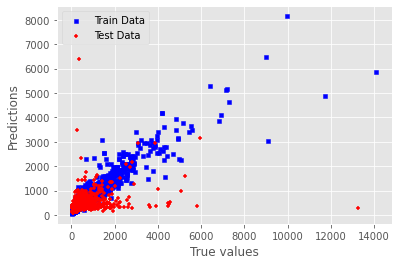

In [202]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# prepare cross validation
kfold = KFold(5, True, 1)
# enumerate splits
for train_index, test_index in kfold.split(x):
    
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
#     print('train: %s, test: %s' % (train_index, test_index))
print(len(train_index),len(test_index))
    
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

train: [   0    1    2 ... 6234 6235 6236], test: [   3   15   20 ... 6225 6229 6231]
train: [   0    1    3 ... 6234 6235 6236], test: [   2    4    5 ... 6222 6226 6230]
train: [   0    1    2 ... 6231 6233 6234], test: [   9   11   22 ... 6232 6235 6236]
train: [   0    1    2 ... 6234 6235 6236], test: [   6    8   12 ... 6217 6227 6233]
train: [   2    3    4 ... 6233 6235 6236], test: [   0    1   10 ... 6218 6224 6234]
4990 1247


C:\anaconda\envs\tenso\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model performance in Train Data
Final score (MSE): 75476.48332317507
Final score (RMSE): 274.7298369729343
Final score (R^2): 0.846250802277137
Average Error: 107.1910
Accuracy = 80.26%
evaulation 0.8855487486558659
Model performance in Test Data
Final score (MSE): 353080.47036708874
Final score (RMSE): 594.2057475042535
Final score (R^2): 0.15368419518396015
Average Error: 262.0365
Accuracy = 49.05%
evaulation 0.720981143468076


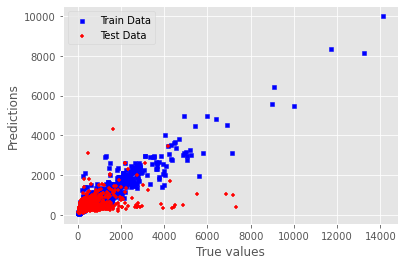

In [139]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# prepare cross validation
kfold = KFold(5, True, 2)
# enumerate splits
for train_index, test_index in kfold.split(x):
    
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    print('train: %s, test: %s' % (train_index, test_index))
print(len(train_index),len(test_index))
    
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 109407.38316703822
Final score (RMSE): 330.7678690064049
Final score (R^2): 0.7771319403573085
Average Error: 150.5365
Accuracy = 62.66%
evaulation nan
Model performance in Test Data
Final score (MSE): 330590.3342477581
Final score (RMSE): 574.9698550774276
Final score (R^2): 0.20759189965275926
Average Error: 282.9105
Accuracy = 28.71%
evaulation nan


C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


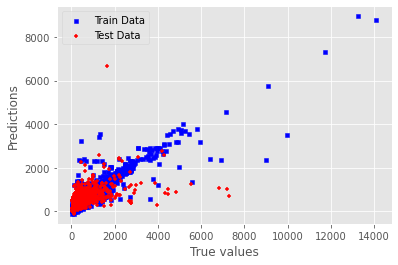

In [140]:
from sklearn import linear_model
model = linear_model.BayesianRidge()
model.fit(x_train,y_train)
performance()

Model performance in Train Data
Final score (MSE): 93326.55040286861
Final score (RMSE): 305.49394495287237
Final score (R^2): 0.8098893639593094
Average Error: 134.5847
Accuracy = 66.59%
evaulation nan
Model performance in Test Data
Final score (MSE): 337410.7760976934
Final score (RMSE): 580.8707051467593
Final score (R^2): 0.19124364984039266
Average Error: 282.7118
Accuracy = 29.33%
evaulation nan


C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
C:\anaconda\envs\tenso\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


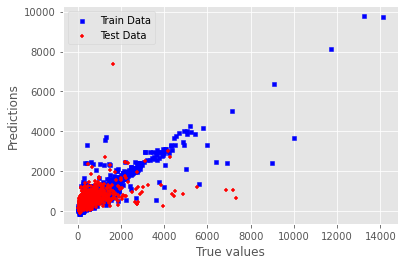

In [143]:
model = linear_model.Ridge(alpha=.5)
model.fit(x_train,y_train)
performance()

train: [   0    1    2 ... 6234 6235 6236], test: [   3   15   27   35   37   40   45   72   79   88  103  112  121  129
  141  184  186  194  199  201  204  207  213  230  242  248  256  257
  265  273  275  277  288  289  317  338  344  353  363  368  377  380
  385  399  411  423  463  491  499  514  521  537  541  558  562  577
  582  584  586  595  604  617  625  626  640  642  646  661  680  683
  694  721  727  744  750  795  799  810  811  814  819  826  834  844
  866  874  885  887  889  909  916  921  925  936  938  948  953  954
  955  957  963 1002 1015 1019 1022 1031 1062 1063 1064 1067 1082 1107
 1109 1111 1112 1116 1135 1142 1145 1146 1150 1156 1160 1177 1190 1193
 1195 1205 1221 1226 1228 1230 1237 1260 1281 1291 1301 1303 1317 1321
 1333 1343 1344 1350 1352 1353 1364 1379 1380 1381 1394 1398 1400 1445
 1447 1451 1457 1460 1469 1490 1494 1526 1527 1533 1543 1547 1553 1558
 1561 1575 1590 1591 1605 1606 1607 1623 1638 1640 1643 1671 1678 1698
 1706 1709 1715 1734 1752 1

C:\anaconda\envs\tenso\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model performance in Train Data
Final score (MSE): 78602.48954112067
Final score (RMSE): 280.3613552919173
Final score (R^2): 0.8365406687377405
Average Error: 104.3913
Accuracy = 80.57%
evaulation 0.8881528065046268
Model performance in Test Data
Final score (MSE): 323302.14700966486
Final score (RMSE): 568.5966470264003
Final score (R^2): 0.25474722550235085
Average Error: 250.0074
Accuracy = 48.49%
evaulation 0.7299971781991426


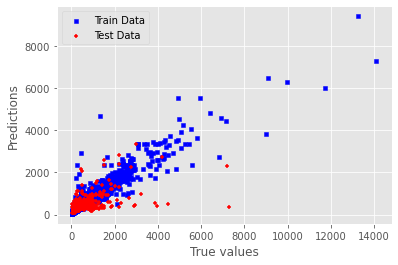

In [144]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# prepare cross validation
kfold = KFold(10, True, 2)
# enumerate splits
for train_index, test_index in kfold.split(x):
    
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    print('train: %s, test: %s' % (train_index, test_index))
print(len(train_index),len(test_index))
    
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

In [146]:
y_pred=model.predict(data_test)
y_pred= pd.DataFrame(y_pred, columns=['Price'])
y_pred.to_csv("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Submission_729.csv", index=False)

5822 415


C:\anaconda\envs\tenso\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model performance in Train Data
Final score (MSE): 73315.22403464628
Final score (RMSE): 270.7678415813929
Final score (R^2): 0.8462735057209338
Average Error: 104.3054
Accuracy = 80.97%
evaulation 0.8888099533976048
Model performance in Test Data
Final score (MSE): 284614.2830656195
Final score (RMSE): 533.4925332801008
Final score (R^2): 0.3886251708298528
Average Error: 224.9734
Accuracy = 50.67%
evaulation 0.7374376753558095


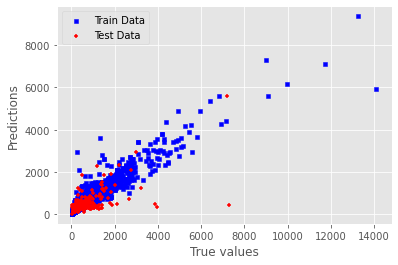

In [203]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# prepare cross validation
kfold = KFold(15, True, 2)
# enumerate splits
for train_index, test_index in kfold.split(x):
    
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
#     print('train: %s, test: %s' % (train_index, test_index))
print(len(train_index),len(test_index))
    
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

In [204]:
y_pred=model.predict(data_test)
y_pred= pd.DataFrame(y_pred, columns=['Price'])
y_pred.to_csv("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Submission_737.csv", index=False)

5926 311


C:\anaconda\envs\tenso\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model performance in Train Data
Final score (MSE): 70185.02922623028
Final score (RMSE): 264.9245727112347
Final score (R^2): 0.8519232169293903
Average Error: 103.4618
Accuracy = 80.95%
evaulation 0.8881446822091176
Model performance in Test Data
Final score (MSE): 298177.223582766
Final score (RMSE): 546.056062673757
Final score (R^2): 0.4244273233186394
Average Error: 230.2562
Accuracy = 48.40%
evaulation 0.7312855825048636


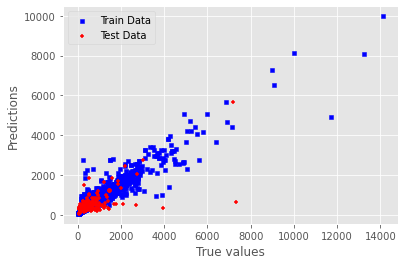

In [151]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# prepare cross validation
kfold = KFold(20, True, 2)
# enumerate splits
for train_index, test_index in kfold.split(x):
    
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
#     print('train: %s, test: %s' % (train_index, test_index))
print(len(train_index),len(test_index))
    
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

In [152]:
y_pred=model.predict(data_test)
y_pred= pd.DataFrame(y_pred, columns=['Price'])
y_pred.to_csv("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Submission_731.csv", index=False)

5926 311


C:\anaconda\envs\tenso\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model performance in Train Data
Final score (MSE): 72835.82055707624
Final score (RMSE): 269.88112300988416
Final score (R^2): 0.846288050914118
Average Error: 102.1535
Accuracy = 80.56%
evaulation 0.8871687664945624
Model performance in Test Data
Final score (MSE): 366799.1008032748
Final score (RMSE): 605.6394148363156
Final score (R^2): 0.29409760877244373
Average Error: 277.9227
Accuracy = 55.65%
evaulation 0.7216200158495997


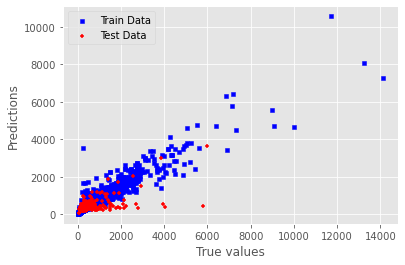

In [182]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

# prepare cross validation
kfold = KFold(20, True, 1)
# enumerate splits
for train_index, test_index in kfold.split(x):
    
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
#     print('train: %s, test: %s' % (train_index, test_index))
print(len(train_index),len(test_index))
    
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()      
model.fit(x_train,y_train)
performance()

In [159]:
y_pred=model.predict(data_test)
y_pred= pd.DataFrame(y_pred, columns=['Price'])
y_pred.to_csv("C:\\Users\\Arzun\\Desktop\\DSprojects\\Participants_Data\\Submission_739.csv", index=False)